Mean without outliers: 100.54743292509804
Median without outliers: 100.41971965200372
Mean with outliers: 121.90650714896988
Median with outliers: 102.97262345336875


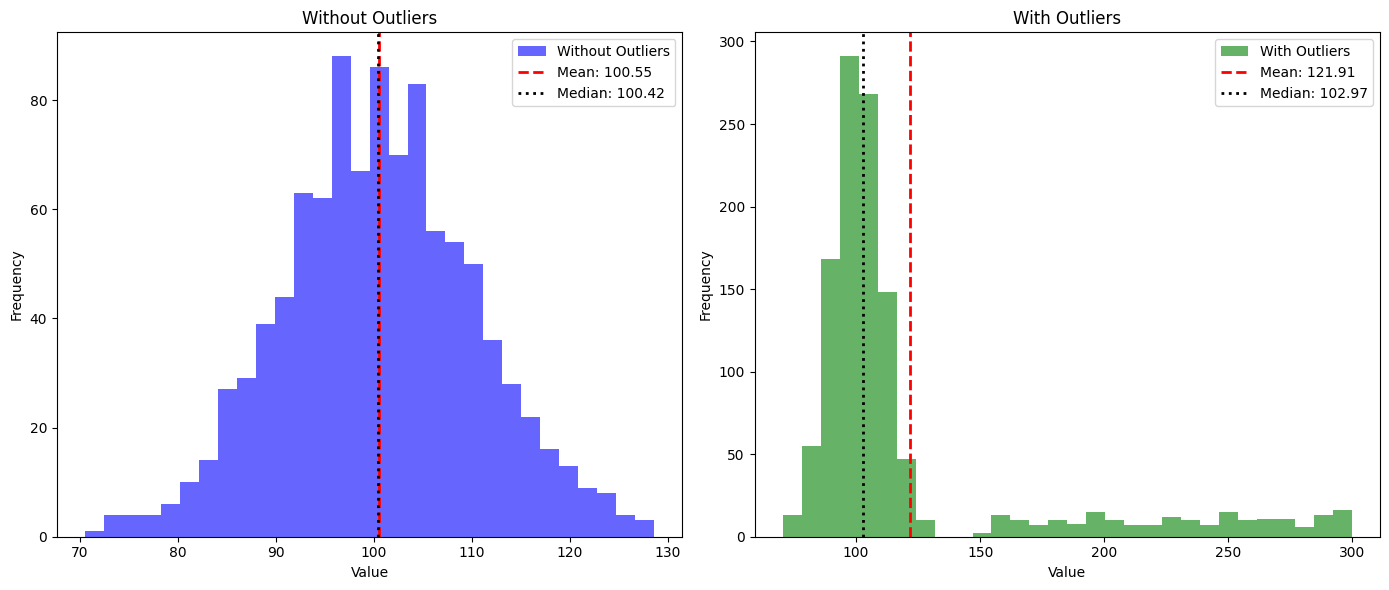

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Generate some data
np.random.seed(0)
data = (
    np.random.normal(50, 10, 1000) + 51
)  # Generate 1000 data points with mean=101 and std=10 (positive values > 1)

# Introduce many more outliers
outliers = np.random.uniform(151, 300, 200)  # Generate 200 outliers between 151 and 300
data_with_outliers = np.concatenate((data, outliers))

# Calculate means and medians
mean_without_outliers = np.mean(data)
median_without_outliers = np.median(data)

mean_with_outliers = np.mean(data_with_outliers)
median_with_outliers = np.median(data_with_outliers)

# Print means and medians
print(f"Mean without outliers: {mean_without_outliers}")
print(f"Median without outliers: {median_without_outliers}")
print(f"Mean with outliers: {mean_with_outliers}")
print(f"Median with outliers: {median_with_outliers}")

# Plot the data using histograms
plt.figure(figsize=(14, 6))

# Histogram without outliers
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color="blue", alpha=0.6, label="Without Outliers")
plt.axvline(
    mean_without_outliers,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean: {mean_without_outliers:.2f}",
)
plt.axvline(
    median_without_outliers,
    color="black",
    linestyle="dotted",
    linewidth=2,
    label=f"Median: {median_without_outliers:.2f}",
)
plt.title("Without Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Histogram with outliers
plt.subplot(1, 2, 2)
plt.hist(data_with_outliers, bins=30, color="green", alpha=0.6, label="With Outliers")
plt.axvline(
    mean_with_outliers,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean: {mean_with_outliers:.2f}",
)
plt.axvline(
    median_with_outliers,
    color="black",
    linestyle="dotted",
    linewidth=2,
    label=f"Median: {median_with_outliers:.2f}",
)
plt.title("With Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

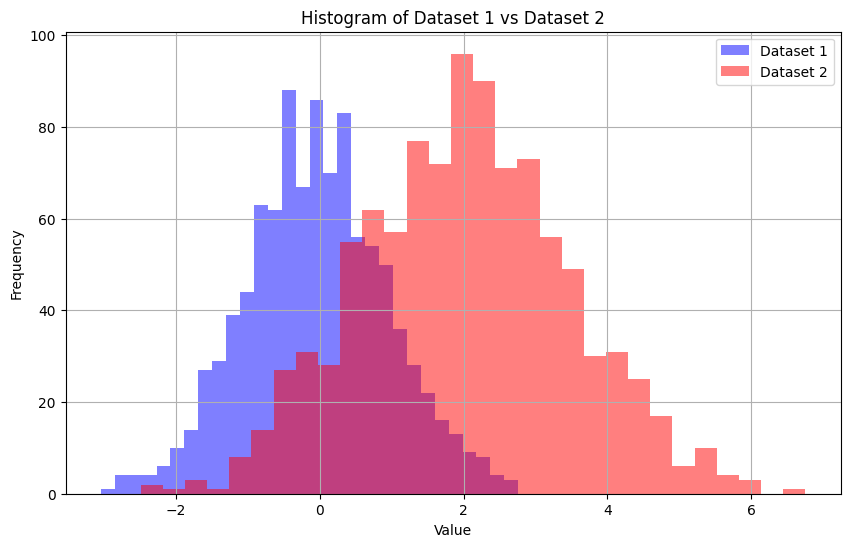

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data (normal distributions)
np.random.seed(0)
dataset1 = np.random.normal(loc=0, scale=1, size=1000)
dataset2 = np.random.normal(loc=2, scale=1.5, size=1000)

# Plotting histograms
plt.figure(figsize=(10, 6))

plt.hist(dataset1, bins=30, alpha=0.5, label="Dataset 1", color="blue")
plt.hist(dataset2, bins=30, alpha=0.5, label="Dataset 2", color="red")

plt.title("Histogram of Dataset 1 vs Dataset 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

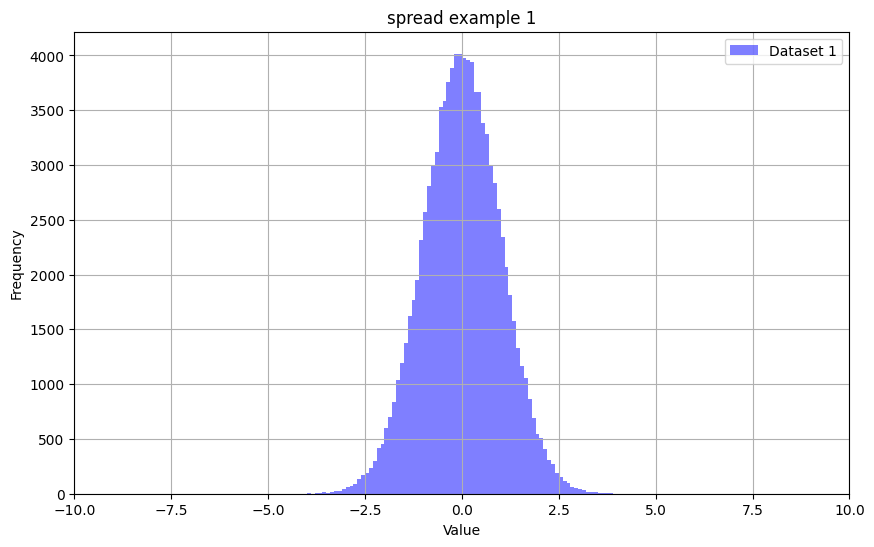

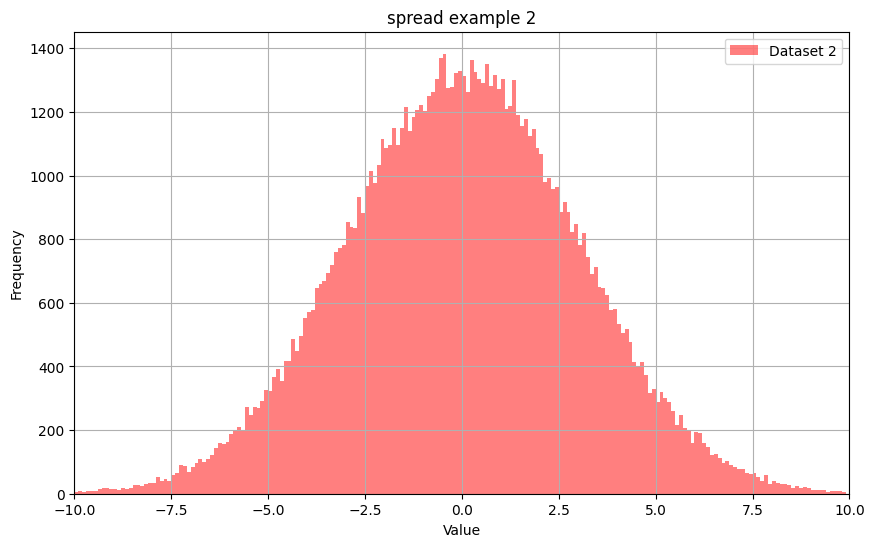

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data (normal distributions)
np.random.seed(0)
dataset1 = np.random.normal(loc=0, scale=1, size=10**5)
dataset2 = np.random.normal(loc=0, scale=3, size=10**5)
limits = 10
# Calculate bins manually to ensure consistency
bin_width = 0.1
bin_range = np.arange(-limits, limits, bin_width)

# Plotting histograms separately
plt.figure(figsize=(10, 6))

plt.hist(dataset1, bins=bin_range, alpha=0.5, label="Dataset 1", color="blue")
plt.title("spread example 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.xlim(-limits, limits)  # Set x-axis limits
plt.show()

plt.figure(figsize=(10, 6))

plt.hist(dataset2, bins=bin_range, alpha=0.5, label="Dataset 2", color="red")
plt.title("spread example 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.xlim(-limits, limits)  # Set x-axis limits
plt.show()

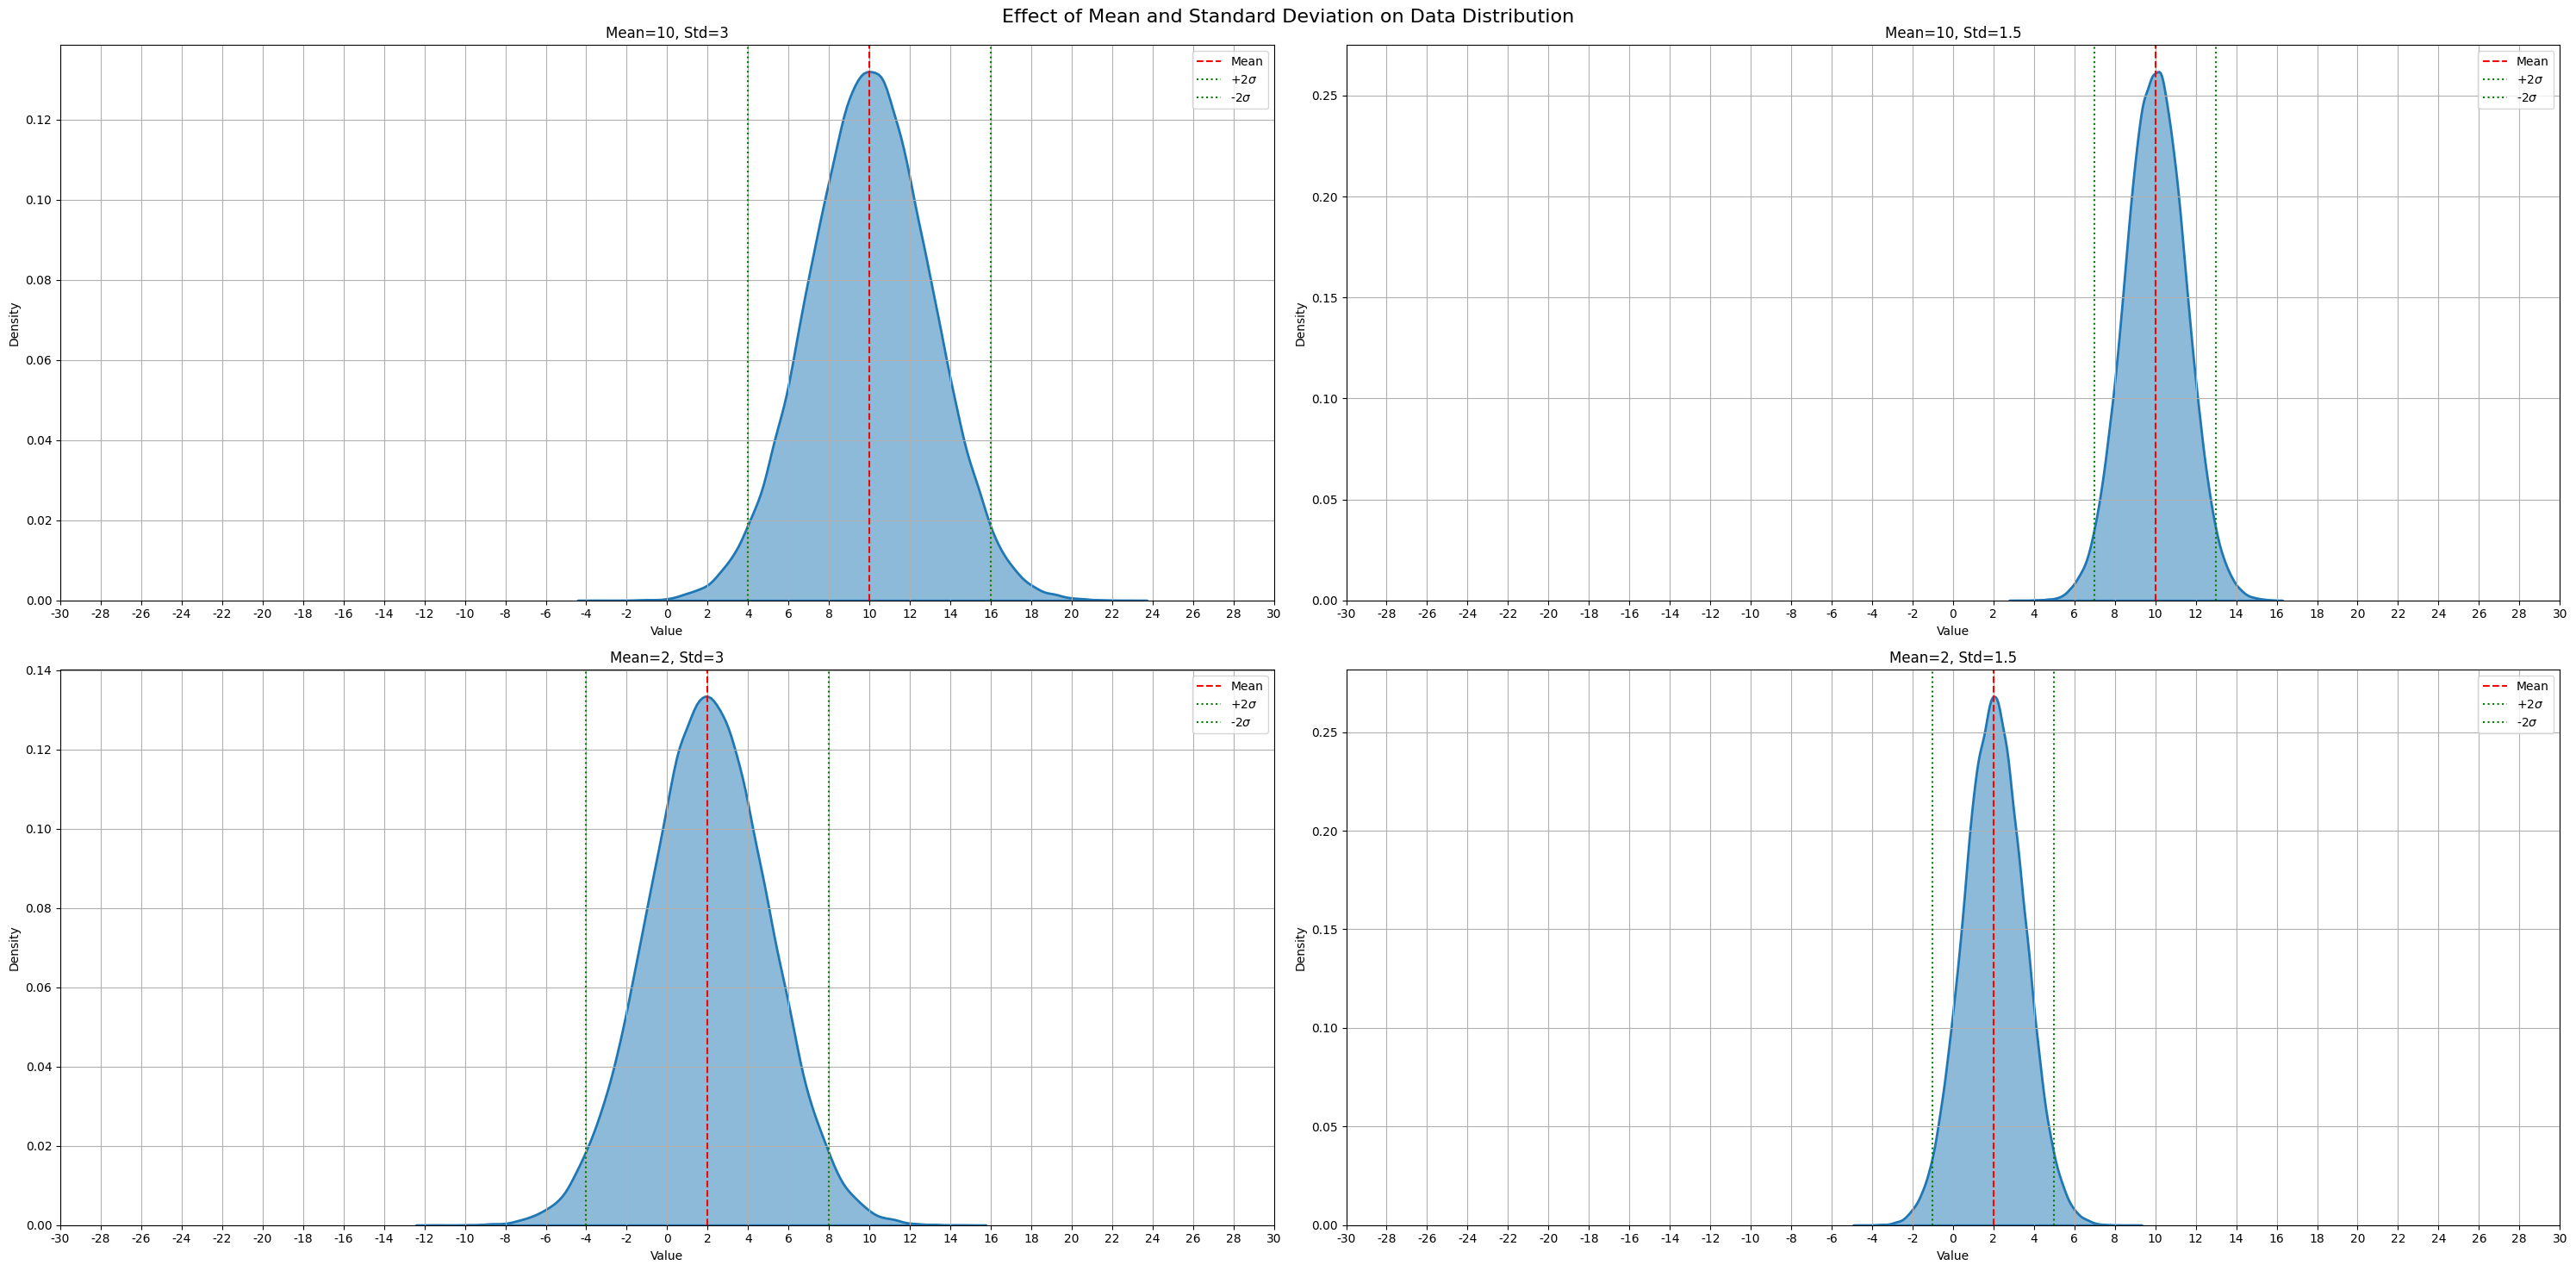

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming seaborn is already imported as shown in the previous snippet

# Data generation parameters
x = np.linspace(0, 10, 10**8)  # X-axis values

# Define different sets of data
data_sets = [
    (10, 3),  # High mean, high std
    (10, 1.5),  # High mean, low std
    (2, 3),  # Low mean, high std
    (2, 1.5),  # Low mean, low std
]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(30, 15))  # Increased figure size
fig.suptitle("Effect of Mean and Standard Deviation on Data Distribution", fontsize=16)


# Function to generate and plot data
def plot_data(ax, mean, std):
    # Generate data with given mean and standard deviation
    y = np.random.normal(mean, std, size=10**5)

    # Use Kernel Density Estimation for smoother curves
    sns.kdeplot(y, ax=ax, fill=True, linewidth=2, alpha=0.5)

    # Set title, labels, and limits
    ax.set_title(f"Mean={mean}, Std={std}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.set_xlim(-30, 30)  # Expanded x-axis range to accommodate 2*sigma

    # Add grid
    ax.grid(True)

    # Calculate 2*sigma lines
    sigma_line_2 = mean + 2 * std
    sigma_line_neg2 = mean - 2 * std

    # Draw lines at mean, 2*sigma, and -2*sigma
    ax.axvline(x=mean, color="r", linestyle="--", label="Mean")  # Mean
    ax.axvline(x=sigma_line_2, color="g", linestyle=":", label="+2$\sigma$")  # 2*sigma
    ax.axvline(
        x=sigma_line_neg2, color="g", linestyle=":", label="-2$\sigma$"
    )  # -2*sigma

    # Reduce x-axis ticks with a step of 2
    ax.xaxis.set_ticks(range(-30, 31, 2))  # Every 2 units
    ax.xaxis.set_ticklabels(range(-30, 31, 2))  # Labels for the ticks

    # Add legend
    ax.legend(loc="upper right")


# Plot each data set
for ax, (mean, std) in zip(axs.flatten(), data_sets):
    plot_data(ax, mean, std)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

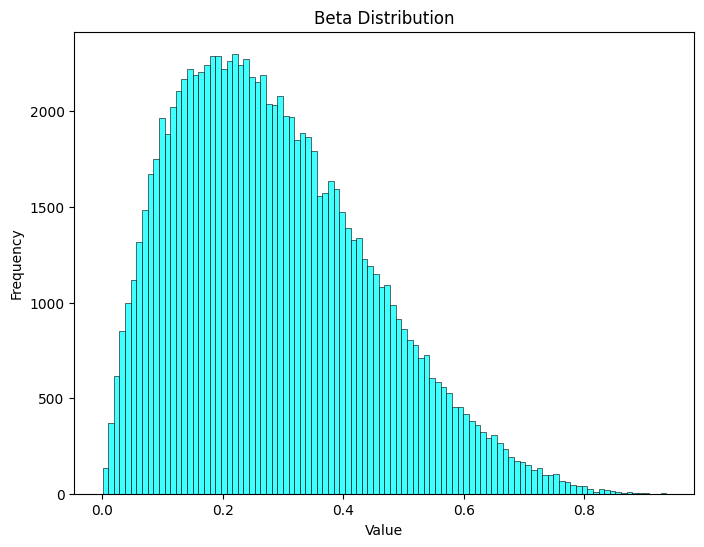

In [ ]:
# Generating data for Beta distribution
data_beta = np.random.beta(a=2, b=5, size=10**5)  # Example parameters a=2, b=5

# Using Seaborn for plotting
plt.figure(figsize=(8, 6))

# Beta distribution plot
sns.histplot(data=data_beta, bins=100, color="cyan", edgecolor="black", kde=False)
plt.title("Beta Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()